<a href="https://colab.research.google.com/github/rafaelarruda/Deep_Learning_com_Mnist.ipynb/blob/main/Deep_Learning_com_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=teal size=5>Importando dataset do keras

In [ ]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist

((treino_x, treino_y), (teste_x, teste_y)) = dataset.load_data()

<font color=teal size=5>Tamanho do dataset

In [ ]:
print(f'Treino_x {treino_x.shape}')
print(f'teste_x {teste_x.shape}')
print(f'treino_y {treino_y.shape}')
print(f'teste_y {teste_y.shape}')

Treino_x (60000, 28, 28)
teste_x (10000, 28, 28)
treino_y (60000,)
teste_y (10000,)


<font color=teal size=5>Visualizando imagem 28x28

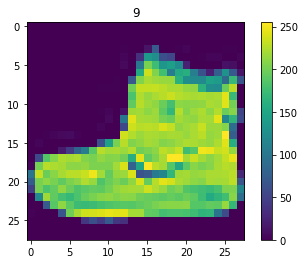

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(treino_x[0])
plt.title(treino_y[0])
plt.colorbar()


<font color=teal size=5>Plotar as outras imagens do dataset

9
0


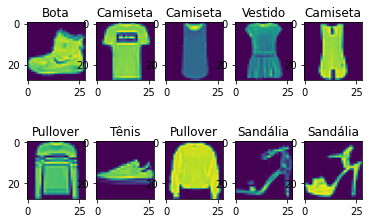

In [ ]:
print(treino_y.max())
print(treino_y.min())

total_de_classificadores = 10

nomes_de_classificacoes = ['Camiseta','Calça','Pullover','Vestido',
                           'Casaco','Sandália','Camisa','Tênis','Bolsa',
                           'Bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(treino_x[imagem])
  plt.title(nomes_de_classificacoes[treino_y[imagem]])

<font color=teal size=5>Criando um modelo

In [ ]:
treino_x = treino_x/float(255)

modelo = keras.Sequential([
              keras.layers.Flatten(input_shape = (28,28)),
              keras.layers.Dense(256, activation=tensorflow.nn.relu),
              keras.layers.Dropout(0.2),
              keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(treino_x, treino_y, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0995 - accuracy: 0.6536 - val_loss: 0.6994 - val_accuracy: 0.7536
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6589 - accuracy: 0.7621 - val_loss: 0.5901 - val_accuracy: 0.7839
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5839 - accuracy: 0.7897 - val_loss: 0.5384 - val_accuracy: 0.8045
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5380 - accuracy: 0.8066 - val_loss: 0.5084 - val_accuracy: 0.8213
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5069 - accuracy: 0.8202 - val_loss: 0.4821 - val_accuracy: 0.8260


<font color=teal size=5>Salvar modelo

In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

<font color=teal size=5>Acessando histórico

In [ ]:
historico.history

{'accuracy': [0.6536250114440918,
  0.7620833516120911,
  0.7897291779518127,
  0.8066250085830688,
  0.820187509059906],
 'loss': [1.0994635820388794,
  0.6588966250419617,
  0.5838595628738403,
  0.5380072593688965,
  0.5068893432617188],
 'val_accuracy': [0.7535833120346069,
  0.7839166522026062,
  0.8044999837875366,
  0.8213333487510681,
  0.8259999752044678],
 'val_loss': [0.6994374394416809,
  0.5900716185569763,
  0.5383708477020264,
  0.5084380507469177,
  0.4820917844772339]}

<font color=teal size=5>Verificar a visualização da rede

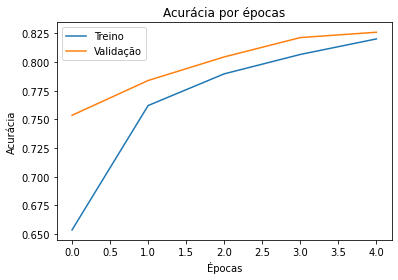

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

<font color=teal size=5>Verificar as perdas

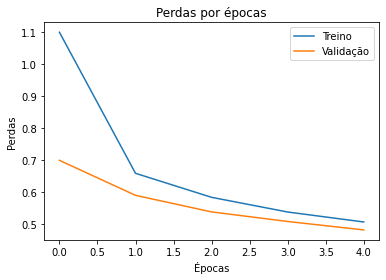

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino','Validação'])

<font color=teal size=5>Testar o modelo

In [ ]:
import numpy as np

teste = modelo.predict(teste_x)
print('Resultado teste: ', np.argmax(teste[1]))
print('Número de imagem de teste: ', teste_y[1])

perda_teste, acuracia_teste = modelo.evaluate(teste_x, teste_y)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

Resultado teste:  2
Número de imagem de teste:  2
313/313 [==============================] - 1s 2ms/step - loss: 20657.4375 - accuracy: 0.6811
Perda do teste:  20657.4375
Acurácia do teste:  0.6811000108718872
